# Verification of 1D diffusion

In 1D, the Cleary and Adrian (1973) solution for the diffusion problem is the following:

$$\begin{align}
C(x,t) = C_i 
+ (C_0 - C_i) A(x,t)
\end{align}$$

$$
\begin{aligned}
A(x,t) ={}& 
\frac{1}{2}\,
\operatorname{erfc}\!\left(
    \frac{R x - v t}{2\sqrt{D R t}}
\right)
+ \frac{1}{2}\,
\exp\!\left(\frac{v x}{D}\right)
\operatorname{erfc}\!\left(
    \frac{R x + v t}{2\sqrt{D R t}}
\right)
\\[6pt]
&+ 
\frac{1}{2}
\left[
    2 
    + \frac{v(2L - x)}{D}
    + \frac{v^{2} t}{D R}
\right]
\exp\!\left(\frac{v L}{D}\right)
\operatorname{erfc}\!\left(
    \frac{R(2L - x) + v t}{2\sqrt{D R t}}
\right)
\\[6pt]
&\quad
- \left(\frac{v^{2} t}{\pi D R}\right)^{1/2}
\exp\!\left[
    \frac{v L}{D}
    - \frac{R}{4 D t}\,(2L - x + \tfrac{v t}{R})^{2}
\right]
\end{aligned}
$$

Where: <br>
$C_i=$ Homogeneous initial concentration <br>
$C_0=$ Boundary concentration <br>
$x=$ Position <br>
$v=$ gas seepage <br>
$D=$ Diffusion coefficient <br>
$t=$ Time

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from frake import GraphFunctions as gf
from scipy.special import erfc
import seaborn as sns

In [ ]:
# function for Cleary and Adrian analytical solution for 1D diffusion with constant concentration boundary condition
def cleary_adrian_1D(x, t, D, C0, L, C_i=0):
    """
    Calculate the Cleary and Adrian analytical solution for 1D diffusion with constant concentration boundary condition.

    Parameters:
    x : float or np.ndarray
        Position(s) at which to evaluate the concentration (m).
    t : float
        Time at which to evaluate the concentration (s).
    D : float
        Diffusion coefficient (m^2/s).
    C0 : float
        Constant concentration at the boundary (kg/m^3).
    L : float
        Length of the domain (m).
    Returns:
    C : float or np.ndarray
        Concentration at position(s) x and time t (kg/m^3).
    """  
    A= erfc(x / (2 * np.sqrt(D * t))) + erfc((2*L-x)/(2 * np.sqrt(D * t)))    
    C = C_i + (C0 - C_i) * A
    return C

In [33]:
# Define x points
x_points = np.linspace(0, 1, 11)  # from 0 to 1 m

#final time simulated
t_final = 7200  # seconds
# Diffusion coefficient
D = 6.11e-5   # m^2/s
# Boundary concentration
C0 = 40  # mol/m^3
# Initial concentration
C_i = 32  # mol/m^3

# snapshot times to evaluate
snapshot_times = np.linspace(0, t_final, 24)  # from 0s to 7200s

# Calculate analytical solution at snapshot times
analytical_solutions = {}
for t in snapshot_times:
    analytical_solutions[t] = cleary_adrian_1D(x_points, t, D, C0, 1, C_i)
    #subtract difference from boundary when different
    if analytical_solutions[t][0] != C0:
        # adjust the correctio linearly, being max at top and half at bottom
        analytical_solutions[t] = analytical_solutions[t] - (analytical_solutions[t][0] - C0) * (1 - 0.5 * x_points)

# Save data in DataFrame for easier col 1: x_points col 2- : concentrations at different times
data = {'Position (m)': x_points}
OB_DATA=[]
for t in snapshot_times:
    data['C'] = analytical_solutions[t]
    if t == 0: #fill with initial condition
        data['C'] = np.full_like(x_points, C_i)
    df = pd.DataFrame(data)
    OB_DATA.append(df)

C:\Users\zamcr\AppData\Local\Temp/ipykernel_1302412/1276244819.py:21: RuntimeWarning: divide by zero encountered in divide
  A= erfc(x / (2 * np.sqrt(D * t))) + erfc((2*L-x)/(2 * np.sqrt(D * t)))
C:\Users\zamcr\AppData\Local\Temp/ipykernel_1302412/1276244819.py:21: RuntimeWarning: invalid value encountered in divide
  A= erfc(x / (2 * np.sqrt(D * t))) + erfc((2*L-x)/(2 * np.sqrt(D * t)))


c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


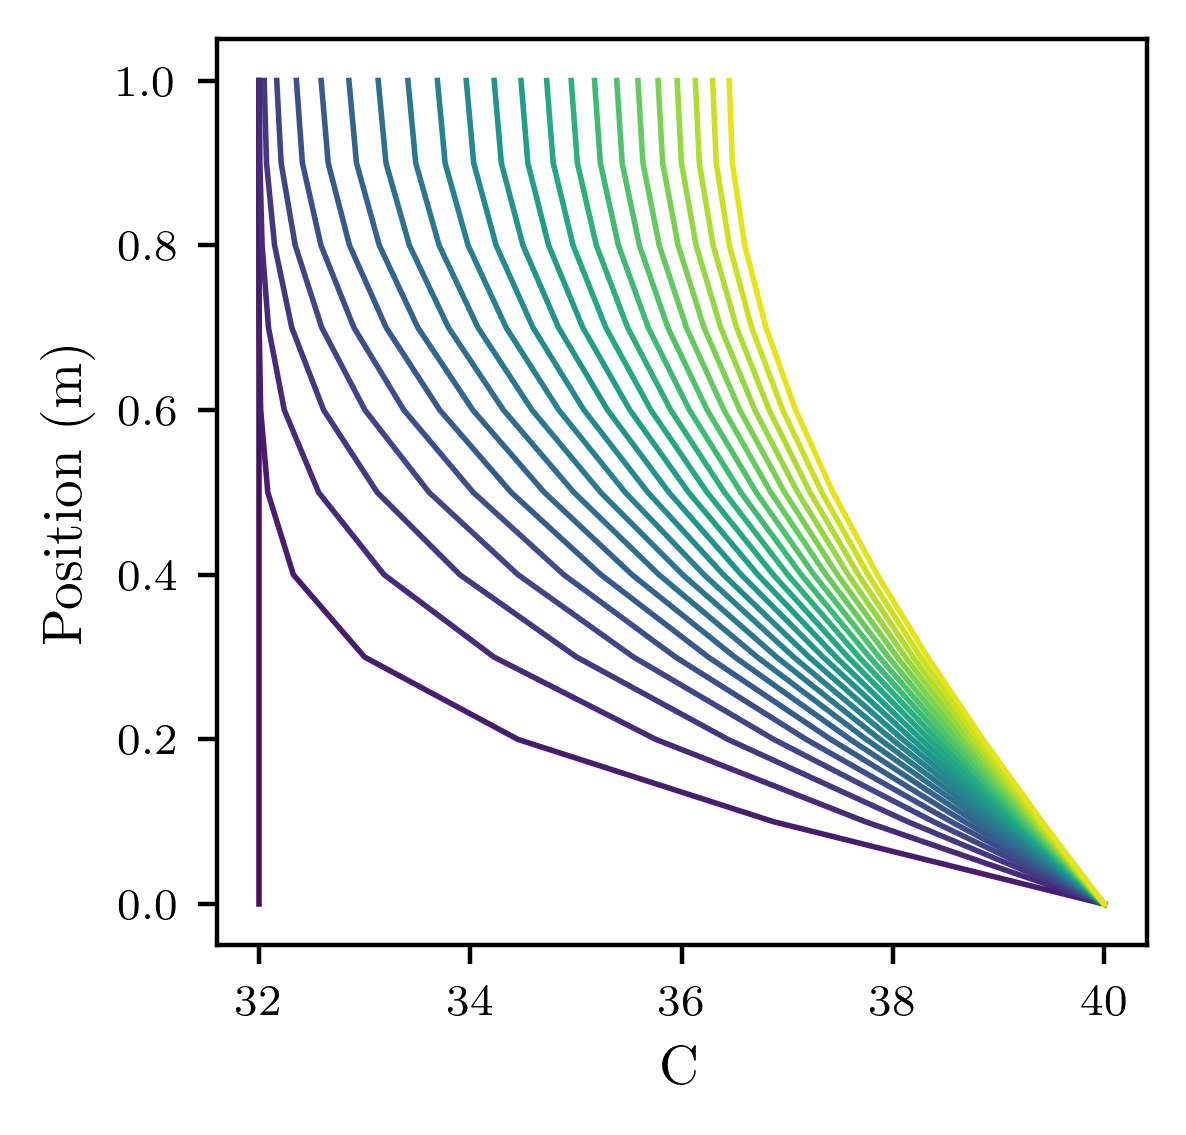

In [34]:
#define a color palette the size of snapshot times
palette = sns.color_palette("viridis", len(snapshot_times))

gf.PlotAll(OB_DATA, snapshot_times, 'C', 'Position (m)', palete=palette, legendMode=False)

In [35]:
OB_DATA[-1]['C'].tail()

6     37.078862
7     36.798628
8     36.597725
9     36.480632
10    36.450090
Name: C, dtype: float64